In [1]:
import pandas as pd
import numpy as np
import plotnine as pn
from plotnine import (
    ggplot,
    aes,
    geom_col,
    theme,
    geom_point,
    scale_x_continuous,
    scale_y_continuous,
)
import math


In [20]:
## Make dummy data 
# The size of someones balance 
binary_data = pd.DataFrame(
    {"Defaulted": [0, 0, 1, 1, 0, 1, 0, 1, 1, 1], "Balance": np.arange(10)}
)
binary_data.head(3)

,Defaulted,Balance
0,0,0
1,0,1
2,1,2


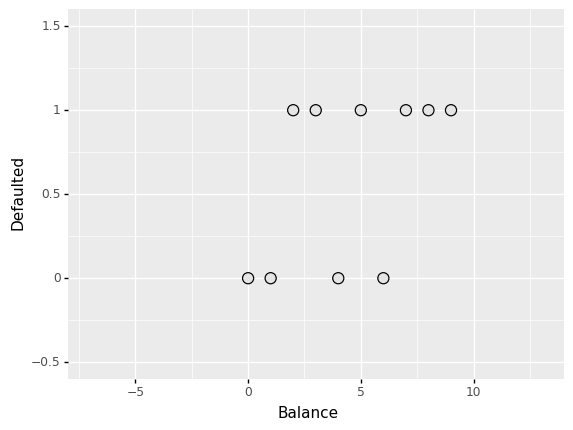

<ggplot: (308495183)>

In [24]:
(
    ggplot(data=binary_data, mapping=aes( "Balance","Defaulted"))
    + geom_point(color = 'black',size = 4)
    + geom_point(color="#e5e5e5",size = 3)
    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-.5, 1.5])
)
# logitic regression models the probabiliy


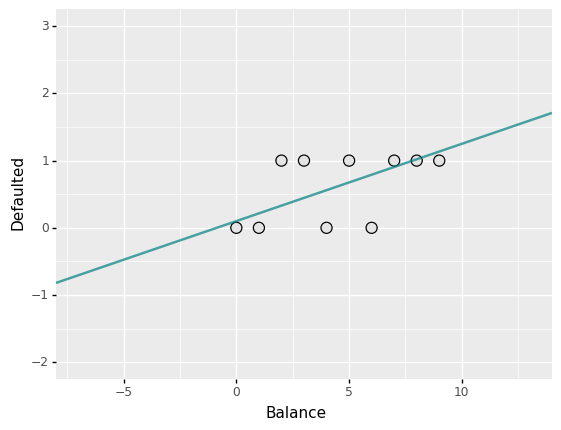

<ggplot: (314406399)>

In [109]:
# Linear does a bad job of modeling probabiliy, so we make a transformation
(
    ggplot(data=binary_data, mapping=aes( "Balance","Defaulted"))
    + geom_point(color = 'black',size = 4)
    + geom_point(color="#e5e5e5",size = 3)
    # + pn.geom_smooth(method="lm", se=False, color="teal", alpha=0.8)
    + pn.geom_abline(slope=0.115,size = 1, intercept=0.1, color="teal", alpha=0.7)
    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-2, 3])
)
# p(Y = 1|X) = b1 + b2X


\begin{align}
\mathop{\mathbb{E}(Y)} =0.1 + 0.115X
\end{align}  



Instead of thinking the the function of X (Balance) as the expected value of y (defaulting). Instead, think of it as a probability.  
In this case, we can chose a function that works better. Before we chose a linear function that fit our data best. (i.e, chosing beta1 and beta2)
\begin{align}
y_i = \beta_0 + \beta_1 x_i
\end{align}

Now, we choose another function, better suited for probabilities, the sigmoid function.

\begin{align}
f(x) =   \frac{\mathrm{1} }{\mathrm{1} + e^{-x} } = \frac{e^{x} }{\mathrm{1} + e^{x} }
\end{align}

We fit the sigmoid function to our data instead. 

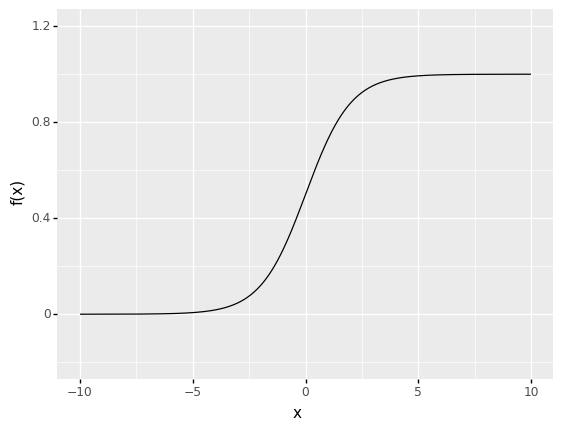

<ggplot: (312083030)>

In [113]:
def sigmoid_function(x):
    return 1 / (1 + math.exp(-x))
(
    ggplot()+
    pn.geom_line(aes(np.arange(-10,10,0.01),list(map(sigmoid_function,np.arange(-10,10,0.01) )) ))
    + scale_y_continuous(limits=[-.2, 1.2])+pn.labs(y = 'f(x)',x='x')
)

/Users/ezracitron/Documents/repos/learning/explore/.venv/lib/python3.10/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 100 rows containing missing values.


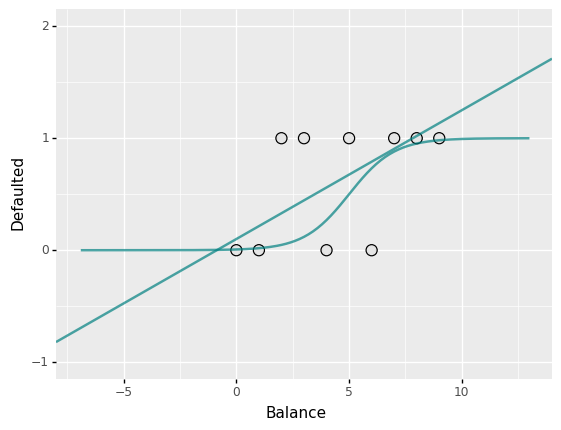

<ggplot: (314385607)>

In [114]:
(
    ggplot( mapping=aes("Balance", "Defaulted"))
    + geom_point(data = binary_data,color = 'black',size = 4)
    + geom_point(data = binary_data,color="#e5e5e5",size = 3)
    + pn.geom_line( 
        mapping=aes(
            np.arange(-10,20,0.1),
            list(map(lambda x: sigmoid_function(-5+x),np.arange(-10,20,0.1) )) ),
            size = 1, color="teal", alpha=0.7)
    + pn.geom_abline(slope=0.115,size = 1, intercept=0.1, color="teal", alpha=0.7)

    + scale_x_continuous(limits=[-7, 13])
    + scale_y_continuous(limits=[-1, 2])
)

$p(Y=1|X) = \frac{\mathrm{1} }{\mathrm{1} + e^{-(\beta_0+\beta_1X)} }$





Before we could say that a unit increase in $X$ causes an increase in $\mathop{\mathbb{E}(Y)}$ by $\beta_1$ units. Now, since we are not using a linear function in $X$, the amount that the probability increases depends on the value of $X$, we could differentiate to find the exact amount. 
With out sigmoid function, a unit increase in $X$ causes a $\frac{d}{dx}( \frac{\mathrm{1} }{\mathrm{1} + e^{-x} })$ change in probability of getting a $Y=1$


however, simple algebra gives 
$$
p(x) = \frac{e^{(\beta_0+\beta_1X)} }{\mathrm{1} + e^{(\beta_0+\beta_1X)}}
$$

$$
p(x)(1 + e^{(\beta_0+\beta_1X)})  = e^{\beta_0+\beta_1X}
$$

$$
 p(x) + p(x)e^{(\beta_0+\beta_1X)} - e^{\beta_0+\beta_1X} = 0 
$$

$$
 e^{\beta_0+\beta_1X}(p(x)-1)  = p(x) 
$$

$$
e^{(\beta_0+\beta_1X)}  = \frac{p(x)}{p(x)-1} 
$$

So a unit increase in $X$ causes a $e^{\beta_1}$ increase in, not the probability, but the _odds_!

Going one step further...

$$
{\beta_0+\beta_1X}  = log_e(\frac{p(x)}{p(x)-1} )
$$

A unit increase in $X$ increases the log of the odds by one unit.

## Odds vrs Probability

In [42]:
import math
math.log(3)


1.0986122886681098

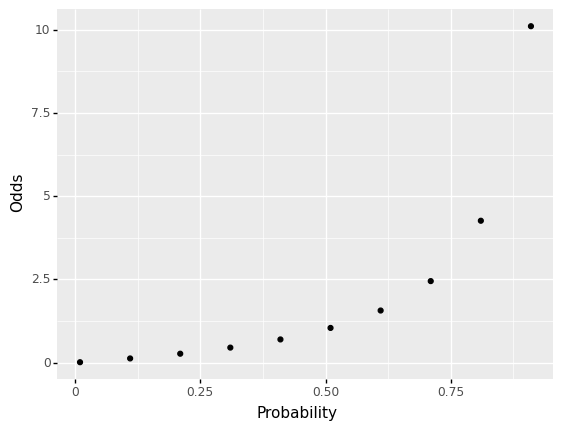

<ggplot: (308299158)>

In [54]:
domain = np.arange(0.01,1,0.1)
(
    ggplot(aes(x =domain ))+
    geom_point(aes(y = list(map(lambda d: d/(1-d),domain))))+
    # geom_point(aes(y=list(map(lambda d: math.log( d/(1-d) ),domain))))+
    theme()+pn.labs(x = "Probability",y = "Odds")
)

## Case Study

In [57]:
defaults = pd.read_csv("data/defaults.csv").assign(default = lambda df: np.where(df.default=="Yes",1,0))
defaults.head()

,default,student,balance,income
0,0,No,729.526495,44361.625074
1,0,Yes,817.180407,12106.134700
2,0,No,1073.549164,31767.138947
3,0,No,529.250605,35704.493935
4,0,No,785.655883,38463.495879


In [66]:
# Simple logistic regression
import statsmodels.formula.api as smf
log_reg = smf.logit("default ~ balance ", data=defaults).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.079823
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 May 2022   Pseudo R-squ.:                  0.4534
Time:                        08:32:35   Log-Likelihood:                -798.23
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                6.233e-290
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.6513      0.361    -29.491      0.000     -11.359      -9.943
balance        0.0055      0.000     24.952      0.000       0.005       0.006
==============================================================================

Possibly complete quasi-separation: A fraction 0.13 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [81]:
## Make predictions
# a balance of 2000 gives significantly higher prob of default
balance = 1000
p = (math.exp(-10.6513 + 0.0055*balance) ) / (1 + math.exp(-10.6513 + 0.0055*balance) )
p



0.005758517810223818

In [85]:
# Simple logistic regression
import statsmodels.formula.api as smf
log_reg = smf.logit("default ~ student", data=defaults).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.145434
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Tue, 10 May 2022   Pseudo R-squ.:                0.004097
Time:                        08:52:06   Log-Likelihood:                -1454.3
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                 0.0005416
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -3.5041      0.071    -49.554      0.000      -3.643      -3.366
student[T.Yes]     0.4049      0.115      3.520      0.000       0.179       0.630
==================================================================================
"""

In [100]:
## Make predictions
# a student gives significantly higher prob of default
student = 1
p = (math.exp(-3.5041 + 0.4049*student) ) / (1 + math.exp(-3.5041 +0.4049*student) )
p / (1-p)



0.045085256175062385

In [101]:
print(0.0450852561750623/0.0300738)

1.4991539537757883


In [86]:
# Mulitple logistic regression
import statsmodels.formula.api as smf
log_reg = smf.logit("default ~ balance + student", data=defaults).fit()
log_reg.summary()

Optimization terminated successfully.
         Current function value: 0.078584
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                default   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9997
Method:                           MLE   Df Model:                            2
Date:                Tue, 10 May 2022   Pseudo R-squ.:                  0.4619
Time:                        08:52:27   Log-Likelihood:                -785.84
converged:                       True   LL-Null:                       -1460.3
Covariance Type:            nonrobust   LLR p-value:                1.189e-293
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        -10.7495      0.369    -29.115      0.000     -11.473     -10.026
student[T.Yes]    -0.7149      0.148     -4.846      0.000      -1.004      -0.426
balance            0.0057      0.000     24.748      0.000       0.005       0.006
==================================================================================

Possibly complete quasi-separation: A fraction 0.15 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""